In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import missingno as msno

from Preprocessing import *

import warnings
warnings.filterwarnings('ignore')

Train samples: 307511
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 17s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 18s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 10s
Installments payments df shape: (339587, 26)
Process installments payments - done in 25s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 18s
Starting LightGBM. Train shape: (206029, 797), test shape: (101478, 797)
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[200]	training's auc: 0.82296	training's binary_logloss: 0.226988	valid_1's auc: 0.772166	valid_1's binary_logloss: 0.243522
[400]	training's auc: 0.856067	training's binary_logloss: 0.212168	valid_1's auc: 0.779167	valid_1's binary_logloss: 0.240546
[600]	training's auc: 0.877746	training's binary_logloss: 0.202346	valid_1's auc: 0.780954	valid_1's binary_logloss: 0

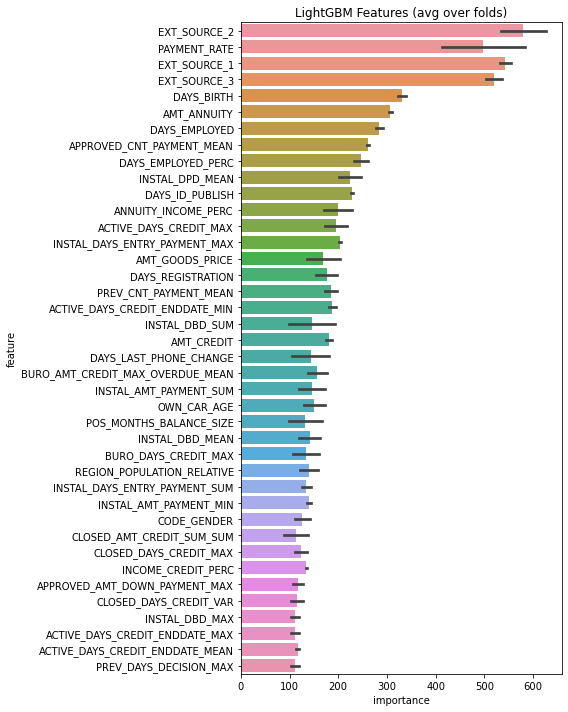

In [3]:
preprocess_total()

In [5]:
train_df = pd.read_csv('df_train_best.csv')
print(train_df.shape)
train_df.head()

(206029, 41)


,CODE_GENDER,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,POS_MONTHS_BALANCE_SIZE,INSTAL_DPD_MEAN,INSTAL_DBD_MAX,INSTAL_DBD_MEAN,INSTAL_DBD_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_SUM,TARGET
0,0,296505.0,23904.0,247500.0,0.007274,-15441,-1089.0,-3544.0,-4006,8.0,...,13.0,0.857143,32.0,5.071429,71.0,381.420,184403.025,-274.0,-6355.0,0
1,0,2025000.0,77130.0,2025000.0,0.009334,-14913,-2052.0,-4399.0,-4423,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,0,288873.0,14179.5,238500.0,0.003813,-21789,NaN,-1508.0,-4151,NaN,...,11.0,0.000000,15.0,11.545455,127.0,10464.390,115108.290,-32.0,-2063.0,0
3,0,506889.0,19237.5,418500.0,0.022625,-21631,-3801.0,-11390.0,-5121,7.0,...,39.0,0.196078,73.0,8.764706,447.0,3123.810,847355.895,-23.0,-24382.0,0
4,1,343800.0,10921.5,225000.0,0.007274,-22672,-776.0,-8376.0,-4166,NaN,...,12.0,1.062500,43.0,8.812500,141.0,50.625,139841.370,-26.0,-2681.0,0


In [6]:
train_df_complet = pd.read_csv('df_train_complet.csv')
print(train_df_complet.shape)
train_df_complet.head()

(206029, 797)


,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT,TARGET
0,259905,0,1,0,0,202500.0,296505.0,23904.0,247500.0,0.007274,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,344030,0,1,0,2,270000.0,2025000.0,77130.0,2025000.0,0.009334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,137317,0,0,0,0,108000.0,288873.0,14179.5,238500.0,0.003813,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,245729,0,1,1,0,180000.0,506889.0,19237.5,418500.0,0.022625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0
4,436566,1,0,0,0,157500.0,343800.0,10921.5,225000.0,0.007274,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
